# Exercise 02

In the course you learned how to do classification using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:

1. It should succeed in less than 10 epochs, so it is okay to change epochs to 10, but nothing larger
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
2. If you add any additional variables, make sure you use the same names as the ones used in the class

I've started the code for you below -- how would you finish it?

# Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


# Exercise 2 Solution

# Download Dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
len(train_images), len(train_labels), len(test_images), len(test_labels)

(60000, 60000, 10000, 10000)

# Visualize images

5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0 

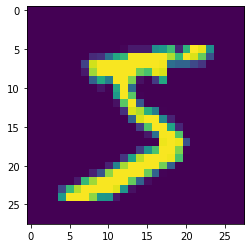

In [4]:
np.set_printoptions(linewidth=200)
print(train_labels[0])
print(train_images[0])
plt.imshow(train_images[0])

# Reshape the Data

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Design the Model

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [12]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Create callback class
class myCallbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') >= 0.99:
      print('\n Reached 99% accuracy, cancelling Training...')
      self.model.stop_training = True

callbacks = myCallbacks()

In [16]:
model.fit(x=train_images,
          y=train_labels,
          epochs=10,
          callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2006 - accuracy: 0.9409
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0797 - accuracy: 0.9760
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0527 - accuracy: 0.9835
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0362 - accuracy: 0.9887
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0291 - accuracy: 0.9905

 Reached 99% accuracy, cancelling Training...


In [17]:
model_evaluation = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0727 - accuracy: 0.9798


In [18]:
print('Loss: ', model_evaluation[0])
print('Accuracy: ', model_evaluation[1])

Loss:  0.07267709076404572
Accuracy:  0.9797999858856201


# Exercise 03

In the videos you looked at how you would improve Fashion MNIST using Convolutions. For your exercise see if you can improve MNIST to 99.8% accuracy or more using only a single convolutional layer and a single MaxPooling 2D. You should stop training once the accuracy goes above this amount. It should happen in less than 20 epochs, so it's ok to hard code the number of epochs for training, but your training must end once it hits the above metric. If it doesn't, then you'll need to redesign your layers.

I've started the code for you -- you need to finish it!

When 99.8% accuracy has been hit, you should print out the string "Reached 99.8% accuracy so cancelling training!"

# Exercise 03 Solution

# Download Dataset

In [19]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [20]:
len(train_images), len(train_labels), len(test_images), len(test_labels)

(60000, 60000, 10000, 10000)

In [21]:
train_images.shape, type(train_images)

((60000, 28, 28), numpy.ndarray)

# Visualize Images

5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0 

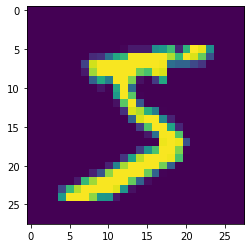

In [22]:
np.set_printoptions(linewidth=200)
print(train_labels[0])
print(train_images[0])
plt.imshow(train_images[0])

# Normalize and reshape Data

In [23]:
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

print(train_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [24]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Design and Train the Model

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=64,
                           kernel_size=(3, 3),
                           activation='relu',
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [26]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1384576   
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Create callback class
class myCallbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') > 0.998:
      print('\n Reached 99.8% accuracy, cancelling Training...')
      self.model.stop_training = True

callbacks = myCallbacks()

In [28]:
model.fit(x=train_images,
          y=train_labels,
          epochs=10,
          callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 35s 5ms/step - loss: 0.1399 - accuracy: 0.9578
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0485 - accuracy: 0.9855
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0300 - accuracy: 0.9905
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0195 - accuracy: 0.9935
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0141 - accuracy: 0.9954
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0111 - accuracy: 0.9965
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0071 - accuracy: 0.9977
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0064 - accuracy: 0.9978
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0045 - accuracy: 0.9985

 Reached 99.8% accuracy, cancelling Training...


In [29]:
model_evaluation = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.0513 - accuracy: 0.9877


In [30]:
print('Loss: ', model_evaluation[0])
print('Accuracy: ', model_evaluation[1])

Loss:  0.05133938416838646
Accuracy:  0.9876999855041504
